<a href="https://colab.research.google.com/github/nguyennhatdangkhoa20130295/ML_Thu3_Ca4/blob/main/Lab_7_20130295_NguyenNhatDangKhoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [ ]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [49]:
# code
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics.cluster import completeness_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import fetch_openml
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
data = datasets.load_iris()
X = data.data
y = data.target
clf = SVC(kernel='linear')
scores = cross_validate(clf, X, y, scoring = 'accuracy', cv=5)
print(sorted(scores.keys()))
print("test_score: ", np.mean(scores['test_score']))
print("fit_time: ", np.mean(scores['fit_time']))
print("score_time: ", np.mean(scores['score_time']))

['fit_time', 'score_time', 'test_score']
test_score:  0.9800000000000001
fit_time:  0.001170778274536133
score_time:  0.0007927894592285156


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
#code
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
rfc = RandomForestClassifier(n_estimators=10)
scores = cross_validate(rfc, X_new, y,scoring='accuracy', cv=10 )
print(sorted(scores.keys()))
print("test_score: ", np.mean(scores['test_score']))
print("fit_time: ", np.mean(scores['fit_time']))
print("score_time: ", np.mean(scores['score_time']))

['fit_time', 'score_time', 'test_score']
test_score:  0.96
fit_time:  0.016429567337036134
score_time:  0.0017351865768432616


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [29]:
# code
dataset = datasets.load_digits()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X_train)
clusters = kmeans.predict(X_test)
kmeans.cluster_centers_.shape
print ("Accuracy score: ", accuracy_score(y_test, clusters))
print ("Completeness score: ", completeness_score(y_test, clusters))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy score:  0.044444444444444446
Completeness score:  0.4481335724543696


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [36]:
# code
labels = np.zeros_like(clusters)
for i in range(3):
 mask = (clusters == i)
 labels[mask] = mode(y_test[mask])[0]

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

kmeans_acc = accuracy_score(y_test, labels)
kmeans_prec = precision_score(y_test, labels , average = 'macro')
kmeans_recall = recall_score(y_test, labels , average = 'macro')
kmeans_f1 = f1_score(y_test, labels , average = 'macro')

rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_prec = precision_score(y_test, rfc_pred, average = 'macro')
rfc_recall = recall_score(y_test, rfc_pred, average = 'macro')
rfc_f1 = f1_score(y_test, rfc_pred, average = 'macro')

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

g_acc = accuracy_score(y_test, gnb_pred)
g_prec = precision_score(y_test, gnb_pred, average = 'macro')
g_recall = recall_score(y_test, gnb_pred, average = 'macro')
g_f1 = f1_score(y_test, gnb_pred, average = 'macro')

t = PrettyTable(['Algorithm','Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(["K-Means", round(kmeans_acc, 2), round(kmeans_prec, 2), round(kmeans_recall, 2), round(kmeans_f1, 2)])
t.add_row(["Random forest", round(rfc_acc, 2), round(rfc_prec, 2), round(rfc_recall, 2), round(rfc_f1, 2)])
t.add_row(["kNN", round(knn_acc, 2), round(knn_prec, 2), round(knn_recall, 2), round(knn_f1, 2)])
t.add_row(["Naivebayes", round(g_acc, 2), round(g_prec, 2), round(g_recall, 2), round(g_f1, 2)])

print(t)

+---------------+----------+-----------+--------+------+
|   Algorithm   | Accuracy | Precision | Recall |  F1  |
+---------------+----------+-----------+--------+------+
|    K-Means    |   0.38   |    0.75   |  0.47  | 0.36 |
| Random forest |   0.89   |    0.9    |  0.91  | 0.9  |
|      kNN      |   0.91   |    0.92   |  0.92  | 0.92 |
|   Naivebayes  |   0.91   |    0.92   |  0.92  | 0.92 |
+---------------+----------+-----------+--------+------+


<ipython-input-36-0feb019481ba>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_test[mask])[0]


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

Supervised learning is better than Unsupervised learning.

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [62]:
# code
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_train)
# get clustering labels
cluster.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 7, 6, 6, 6, 2, 4, 6, 4, 7, 0, 3, 1, 7, 8, 0, 2, 4, 0, 0, 1,
       3, 3, 4, 5, 8, 0, 0, 0, 0, 0, 9, 1, 0, 0, 3, 0, 3, 6, 0, 1, 6, 9,
       9, 0, 0, 0, 2, 1, 0, 2, 0, 0, 6, 2, 0, 6, 3, 9, 0, 4, 4, 0, 3, 4,
       1, 0, 9, 0, 4, 0, 3, 4, 8, 3, 0, 9, 0, 1, 3, 0, 0, 0, 7, 3, 3, 0,
       0, 4, 0, 3, 0, 9, 5, 2, 2, 0, 6, 0, 5, 0, 2, 0, 2])

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





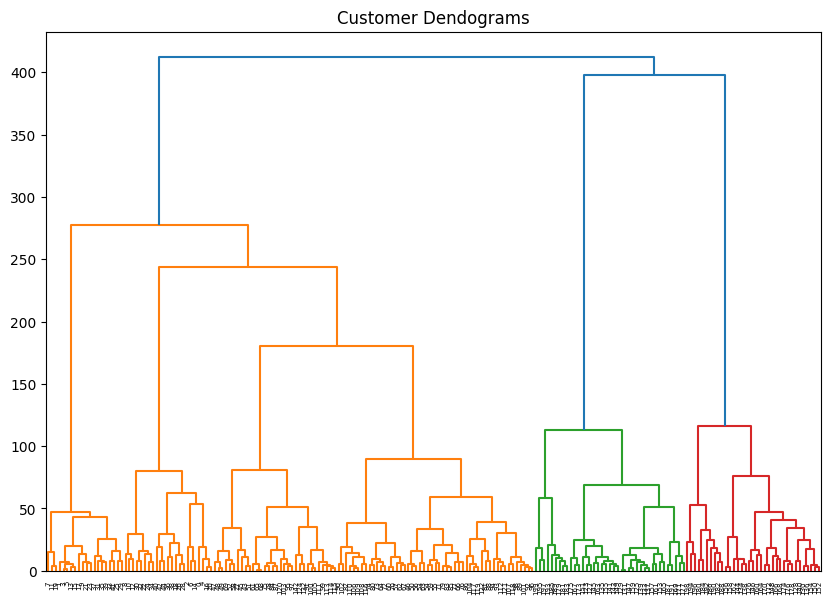

In [50]:
#code
dataset = pd.read_csv('shopping-data.csv')
data = dataset.drop(['CustomerID', 'Genre'], axis=1)

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data.iloc[:, 0:], method='ward'))


*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'SSE')

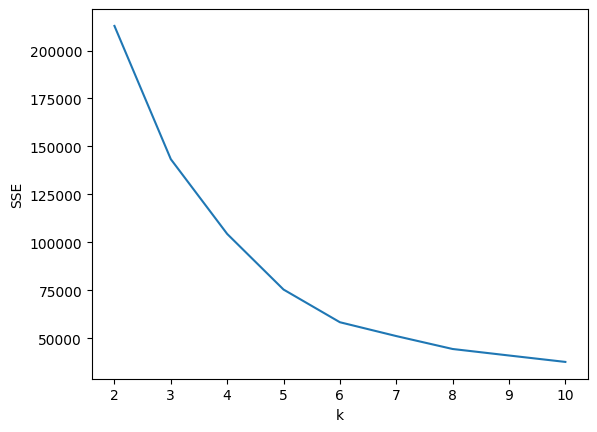

In [61]:
#code
sse = []
X = data.iloc[:,:].values
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(X)
 sse.append(kmeans.inertia_)

plt.plot(range(2,11), sse)
plt.xlabel('k')
plt.ylabel('SSE')


*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [67]:
#code
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
# get clustering labels
cluster.labels_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

#Finally,
Save a copy in your Github. Remember renaming the notebook.